In [1]:
import random   as rnd
import pandas   as pd
import numpy    as np
import seaborn as sns
import matplotlib.pyplot as plt
import import_ipynb
from sklearn.model_selection    import train_test_split
import Preprocessing as pr

importing Jupyter notebook from Preprocessing.ipynb


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [2]:
housing = pd.read_csv('housing.csv')

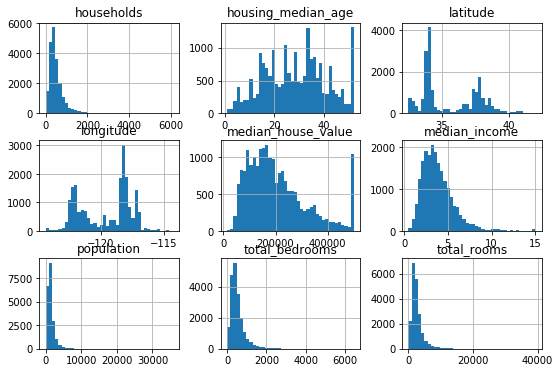

In [3]:
housing.hist(bins = 40, figsize = (9, 6));

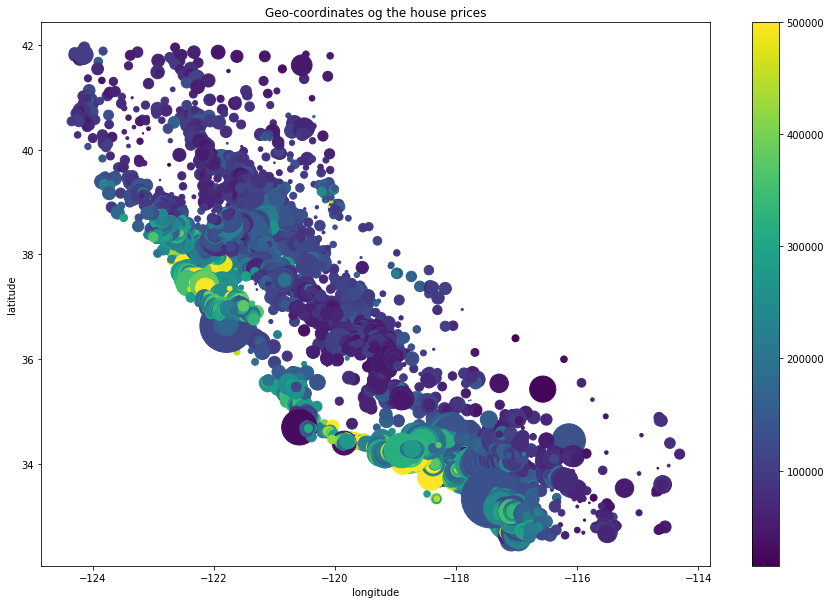

In [10]:
plt.figure(figsize=(15,10))
plt.scatter(housing['longitude'],housing['latitude'],c=housing['median_house_value'],s=housing['population']/10,cmap='viridis')
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Geo-coordinates og the house prices')
plt.show()

### Correlation Matrix

In [4]:
corr_mat = housing.corr()
corr_mat['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

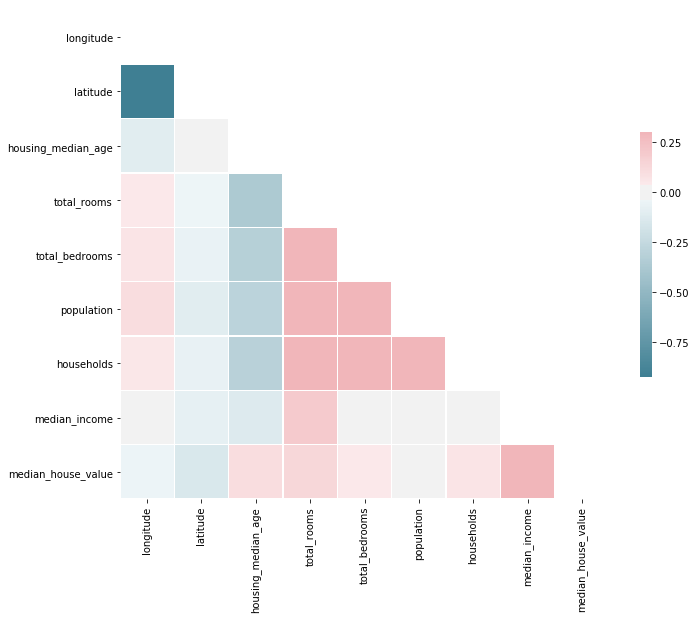

In [5]:
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Checking for outliers

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


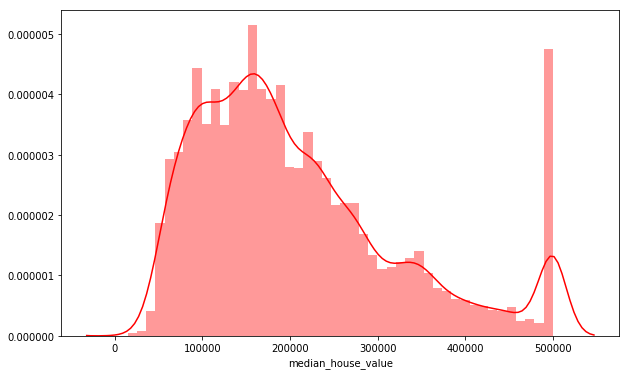

In [6]:
plt.figure(figsize=(10,6))
sns.distplot(housing['median_house_value'],color='red')
plt.show()

[]

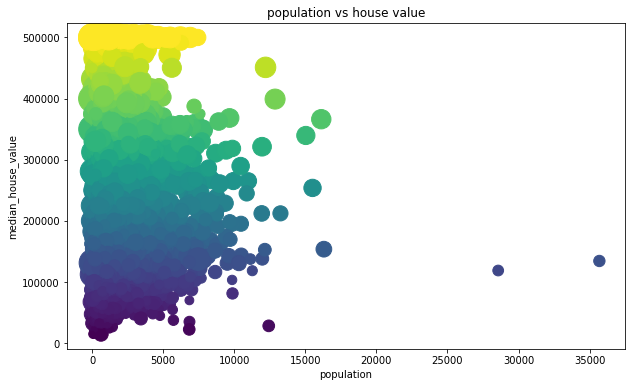

In [8]:
plt.figure(figsize=(10,6))

plt.scatter(housing['population'],housing['median_house_value'],c=housing['median_house_value'],s=housing['median_income']*50)
plt.title('population vs house value' )
plt.xlabel('population')
plt.ylabel('median_house_value')
plt.plot()